# <center>⚡️🏁 [Welcome!](https://stepik.org/lesson/1062722/step/2?unit=1072411) Альтернативные модели для прохождения курса! 📔 </center>

<img src='../images/choice_api.jpeg' align="right" width="400" height="400" >



# <center id="part1">  🤖 Модели `Mistral`!

<div style="background-color:#fff0ff; padding:10px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
На ноябрь 2025 года в РФ запросы по API к моделям `OpenAI` и других вендоров через прокси работают нестабильно, часто происходят сбои.

Поэтому представляем альтернативу для прохождения курса - API от `Mistral`.
* Пока работают в РФ напрямую без прокси
* Отправляют СМС на номера РФ
* Дают 150$ на токены по АПИ для экспериментов
* Большой количество разных моделей, по качеству подходящих для обучения и проектов.

<div class="alert alert-info" style="padding:10px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
    
**📖  Получение ключа для использования `Mistral API` 🔑**

1. Переходим [mistral.ai](https://mistral.ai)
2. Жмем "Start Building"
3. Регистрируем бесплатный аккаунт
4. Подтверждаем номер телефона
5. Переходим в раздел API Keys
6. Create new API key

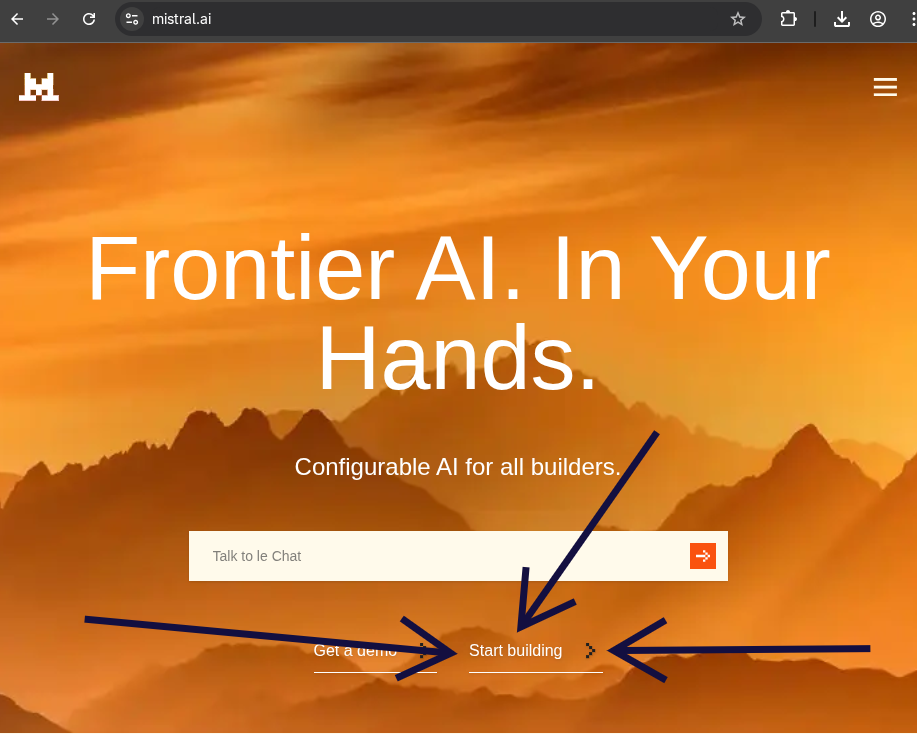

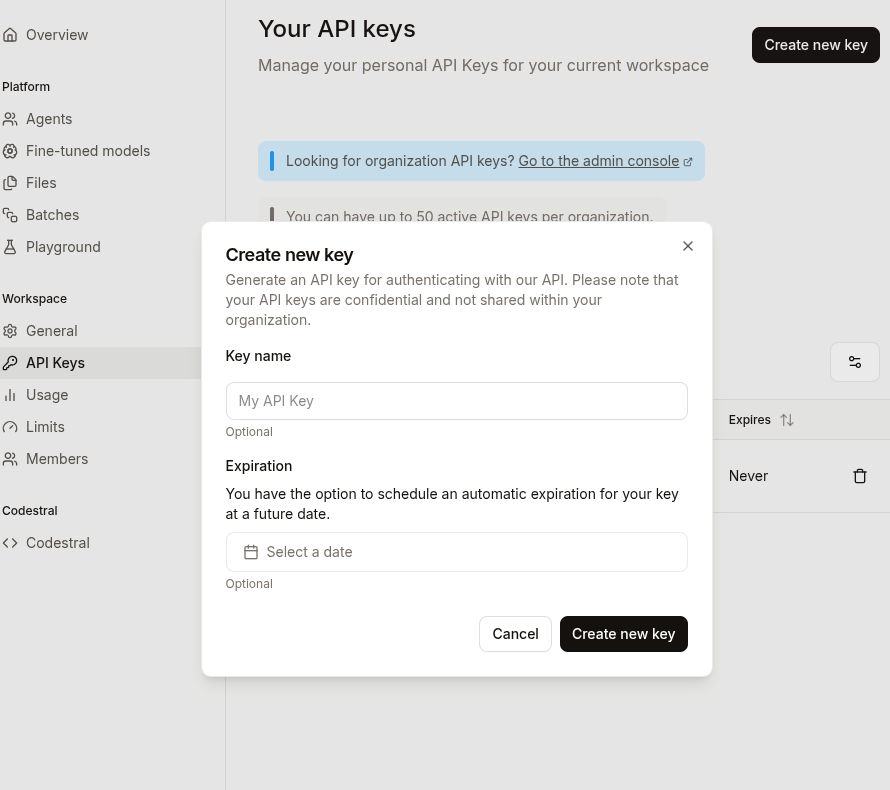

* ⚙️ Теперь можно пользоваться также как API от OpenAI.
* 🗂 [Документация и доступные модели](https://docs.mistral.ai/getting-started/models)
* 🎁 Просто в начале ноутбуков урока или для решения задач, меняем одну модель на другую, больше ничего не поменяется.

In [3]:
import os
import warnings
from getpass import getpass  # Для скрытого ввода API ключей

warnings.filterwarnings("ignore")

#### Для любого варианта использования сначала обязательно установить необходимые библиотеки!

In [ ]:
# Установим нужные библиотеки
!pip install langchain-classic langchain mistralai langchain-mistralai -U -q

## Куда вводить ключи: <br>

<div style="background-color:#fff0ff; padding:10px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
    
**1 вариант** - В появившемся окне после выполнения ячейки с `getpass` - более безопасно, но придется вводить ключ при каждом перезапуске ноутбука.

<img src='../images/wind.png' width="600" height="300" >

In [4]:
# Ключ следует вводить в появившемся окне после запуска ячейки и нажать Enter
# Либо раскомментировать строку ниже и записать ключ в переменную (менее безопасно)

# mistral_api_key = "Введите ваш OpenAI API-ключ"
mistral_api_key = getpass(prompt="Введите ваш Mistral API-ключ")

Введите ваш Mistral API-ключ ········


<div style="background-color:#fff0ff; padding:10px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">

**2 вариант** - Если ноутбуком будете пользоваться только вы, и точно уверены, что ноутбук с ключом не будет доступен третьим лицам. Можно постоянно не вводить ключ.

<img src='../images/wind2.png' width="600" height="300" >

In [5]:
from mistralai import Mistral

client = Mistral(api_key=mistral_api_key)

In [9]:
# Протестируем и посмотрим на большой список доступных моделей!
def test_connection():
    try:
        models = client.models.list()
        print("✅ Connected successfully!")
        print(f"Available models: {[m.id for m in models.data]}")
    except Exception as e:
        print(f"❌ Connection failed: {e}")
        print("💡 If key is not active yet, wait a few minutes and try again")
test_connection()

✅ Connected successfully!
Available models: ['mistral-medium-2505', 'mistral-large-latest', 'mistral-medium-2508', 'mistral-medium-latest', 'mistral-medium', 'ministral-3b-2410', 'ministral-3b-latest', 'ministral-8b-2410', 'ministral-8b-latest', 'open-mistral-7b', 'mistral-tiny', 'mistral-tiny-2312', 'open-mistral-nemo', 'open-mistral-nemo-2407', 'mistral-tiny-2407', 'mistral-tiny-latest', 'mistral-large-2411', 'pixtral-large-2411', 'pixtral-large-latest', 'mistral-large-pixtral-2411', 'codestral-2508', 'codestral-latest', 'devstral-small-2507', 'devstral-small-latest', 'devstral-medium-2507', 'devstral-medium-latest', 'pixtral-12b-2409', 'pixtral-12b', 'pixtral-12b-latest', 'mistral-small-2501', 'mistral-small-2506', 'mistral-small-latest', 'magistral-medium-2509', 'magistral-medium-latest', 'magistral-small-2509', 'magistral-small-latest', 'voxtral-mini-2507', 'voxtral-mini-latest', 'voxtral-small-2507', 'voxtral-small-latest', 'devstral-small-2505', 'magistral-small-2506', 'magistra

In [11]:
messages = [
    {
        "role": "user",  # Роль - ассистент или юзер
        "content": "1+1",  # Сам промпт для подачи в модель
    }
]

chat_completion = client.chat.complete(
    max_tokens=100,
    model="mistral-small-latest",  # модель для выбора
    messages=messages,  # сообщение
    #temperature=0,  # степень креативности ответа
)

print(chat_completion.choices[0].message.content)

The sum of 1 + 1 is **2**.

Here it is:
1 + 1 = 2


# <center id="part3"> 🤐 Чат модели и объект `ChatMistralAI` от `LangChain`


<div style="background-color:#fff0ff; padding:10px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
    
📖 В `Langchain` так же есть интеграция для моделей `Mistral`!

In [12]:
from langchain_mistralai import ChatMistralAI
from langchain_classic.prompts import PromptTemplate

template = """Вопрос: {question}
Ответ: Дай короткий ответ"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm = ChatMistralAI(
    model="mistral-small-latest",
    max_retries=2,
    api_key=mistral_api_key
)

llm_chain = prompt | llm

question = "Когда человек первый раз полетел в космос?"

print(llm_chain.invoke(question).content)

Человек впервые полетел в космос **12 апреля 1961 года**. Это был советский космонавт **Юрий Гагарин** на корабле «Восток-1».


<div style="background-color:#fff0ff; padding:10px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
    
📖 В уроке про `RAG` вам понадобится эмбеддинг модель от `Mistral`, с этим тоже никаких проблем - всё готово!

In [ ]:
from langchain_mistralai import MistralAIEmbeddings

embeddings_api_model = MistralAIEmbeddings(
    api_key=mistral_api_key,
    model='mistral-embed',  # или 'mistral-embed-large' для более продвинутой модели
)

<div style="background-color:#fff0ff; padding:10px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
    
📖 В ТГ-канале курса проводили [мастер-класс](https://t.me/big_llm_course/47) по использованию моделей `GigaChat` от Сбера!
